# Run for multiple times to test the generalized improvement this new method achieve

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/MyDrive/capstone/clip_images/

! pip install -q torch_utils
! pip install -q git+https://github.com/openai/CLIP.git
! pip install -q gwpy

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/MyDrive/capstone/clip_images/'
/content/gdrive/MyDrive/capstone/clip_images
     |████████████████████████████████| 1.4 MB 14.0 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 11.2 MB 80.9 MB/s 
     |████████████████████████████████| 930 kB 83.2 MB/s 
     |████████████████████████████████| 4.0 MB 79.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Load all packages

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import cuda
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, sampler
import torch.nn.functional as F
from torch_utils import AverageMeter
import math
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import mean_squared_error
from numpy import inf
import torchvision
import cv2

from sklearn.model_selection import train_test_split
import os
from glob import glob
from torchvision import transforms
from torchvision import datasets
from torchvision import models
from torch import optim, cuda, Tensor
import tqdm

# Data science tools
import numpy as np

import os

# Image manipulations
from PIL import Image
from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
#plt.rcParams['font.size'] = 14

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from timeit import default_timer as timer

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import f1_score

import clip

## Define CNN and functions

In [ ]:
# define model
class bmodel(nn.Module):
    def __init__(self):
        super(bmodel, self).__init__()
        # Define all the layers that you need in your network
        # You can use nn.Conv2d() to define the 2d convolutional layer
        # You can use nn.MaxPool2d() to define the 2d maxpooling layer
        # You can use nn.Linear() to define the linear layer
        # You can use F.relu() to define your ReLu layer
        ######################
        ### YOUR CODE HERE ###
        ######################
        self.conv1 = nn.Conv2d(1, 10, 3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(10, 20, 4)
        self.fc1 = nn.Linear(20 * 5 * 5, 250)
        self.fc2 = nn.Linear(250, 50)
        self.fc3 = nn.Linear(50, 2)
        self.dropout = nn.Dropout(0.5)
        #####################
        ### YOUR CODE END ###
        #####################

    def forward(self, x):
        # You may use x.view() to reshape the tensor.
        ######################
        ### YOUR CODE HERE ###
        ######################
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(x)
        x = F.relu(self.fc1(x))  
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
        #####################
        ### YOUR CODE END ###
        #####################

model = bmodel()

#####################
### YOUR CODE HERE###
#####################
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
####################
### YOUR CODE END###
####################

def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=10,
          print_every=1):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()

        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            
            # Tensors to gpu, both model parameters, data, and target need to be tensors.
            # You can use .cuda() function
            ######################
            ### YOUR CODE HERE ###
            ######################
            model.cuda()
            data = data.cuda()
            target = target.cuda()
            #####################
            ### YOUR CODE END ###
            #####################

            # Clear gradients
            optimizer.zero_grad()

            # Forward path
            ######################
            ### YOUR CODE HERE ###
            ######################
            output = model(data.float())
            #####################
            ### YOUR CODE END ###
            #####################

            # Loss function 
            ######################
            ### YOUR CODE HERE ###
            ######################
            loss = criterion(output, target.long())
            #####################
            ### YOUR CODE END ###
            #####################

            # Backward path (backpropagation)
            ######################
            ### YOUR CODE HERE ###
            ######################
            loss.backward()
            #####################
            ### YOUR CODE END ###
            #####################

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))

            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))

            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():

                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    ######################
                    ### YOUR CODE HERE ###
                    ######################
                    data = data.cuda()
                    target = target.cuda()
                    #####################
                    ### YOUR CODE END ###
                    #####################

                    # Forward path
                    ######################
                    ### YOUR CODE HERE ###
                    ######################
                    output = model(data.float())
                    #####################
                    ### YOUR CODE END ###
                    #####################

                    # Validation loss computation
                    ######################
                    ### YOUR CODE HERE ###
                    ######################
                    loss = criterion(output, target.long())
                    #####################
                    ### YOUR CODE END ###
                    #####################

                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                    correct_tensor.type(torch.FloatTensor))

                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)


                # Calculate average losses and Calculate average accuracy
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                '''
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )
                '''
                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model 
                    # You can use torch.save()
                    ######################
                    ### YOUR CODE HERE ###
                    ######################
                    torch.save(model.state_dict(), save_file_name)
                    #####################
                    ### YOUR CODE END ###
                    #####################

                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        # You can use model.load_state_dict()
                        ######################
                        ### YOUR CODE HERE ###
                        ######################
                        model.load_state_dict(torch.load(save_file_name))
                        #####################
                        ### YOUR CODE END ###
                        #####################

                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_best_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

## Read in data and split them

In [ ]:
%%capture

diff_acc = []
diff_f1 = []

for i in range(30):
  all_data = np.load("training.npy")
  all_labels = np.load("pred.npy")

  all_ex_data = np.expand_dims(all_data, axis=1)

  train_ind = np.random.choice(all_ex_data.shape[0], int(all_ex_data.shape[0] * 0.8), replace=False)
  valid_ind = np.setdiff1d(range(all_ex_data.shape[0]), train_ind)

  train_X = all_ex_data[train_ind]
  train_Y = all_labels[train_ind]

  validation_X = all_ex_data[valid_ind]
  validation_Y = all_labels[valid_ind]

  # Datasets organization
  batch_size = 16

  data = {
      'train':
      TensorDataset(torch.from_numpy(train_X), torch.from_numpy(train_Y).float()),
      'valid':
      TensorDataset(torch.from_numpy(validation_X), torch.from_numpy(validation_Y).float())
  }

  dataloaders = {
      'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True,num_workers=10),
      'valid':
      DataLoader(data['valid'], batch_size=batch_size, shuffle=True,num_workers=10)
  }


  # Iterate through the dataloader once
  trainiter = iter(dataloaders['train'])
  validationiter = iter(dataloaders['valid'])

  classes = ("breast", "chest")

  save_file_name = f'CNN_model_best_model.pt'
  train_on_gpu = cuda.is_available()

  model, history = train(model,
      criterion,
      optimizer,
      dataloaders['train'], 
      dataloaders['valid'],
      save_file_name=save_file_name,
      max_epochs_stop= 10,
      n_epochs=20,
      print_every=1)

  breast_path = '../data/breastmnist.npz'
  breast = np.load(breast_path)

  chest_path = '../data/chestmnist.npz'
  chest = np.load(chest_path)

  test_breast = np.concatenate([breast['val_images'], breast['test_images']], axis=0)
  test_chest = np.concatenate([chest['val_images'], chest['test_images']], axis=0)
  random_chest_ind = np.random.choice(a=test_chest.shape[0], size=test_breast.shape[0])
  test_chest = test_chest[random_chest_ind]
  test = np.concatenate([test_breast, test_chest], axis=0)
  true_labels = [0]*test_breast.shape[0] + [1]*test_chest.shape[0]

  test_channel = np.expand_dims(test, axis=1)
  test_channel.shape

  outputs = model(torch.from_numpy(test_channel).cuda().float())
  _, predicted = torch.max(outputs, 1)
  CNN_acc = (np.array(true_labels) == np.array(predicted.tolist())).sum() / len(true_labels)
  CNN_f1 = f1_score(y_true=np.array(true_labels), y_pred=np.array(predicted.tolist()))

  ##########################################################
  clip_model, preprocess = clip.load("ViT-L/14")
  clip_model.cuda().eval()
  input_resolution = clip_model.visual.input_resolution
  context_length = clip_model.context_length
  vocab_size = clip_model.vocab_size

  uni_labels = ['breast', 'chest']
  text_descriptions = [f"This is a photo of {label}, and it's a type of organ." for label in uni_labels]
  text_tokens = clip.tokenize(text_descriptions).cuda()

  with torch.no_grad():
      text_features = clip_model.encode_text(text_tokens).float()
      text_features /= text_features.norm(dim=-1, keepdim=True)

  SS = test.shape[0]
  original_images = [Image.fromarray(test[j]) for j in range(SS)]

  images = [preprocess(j) for j in original_images]
  image_input = torch.tensor(np.stack(images)).cuda()

  with torch.no_grad():
      image_features = clip_model.encode_image(image_input).float()

  text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)
  top_probs, top_labels = text_probs.cpu().topk(1, dim=-1)

  pred_labels = np.squeeze(top_labels).numpy()
  CLIP_acc = (true_labels == pred_labels).sum() / len(true_labels)
  CLIP_f1 = f1_score(y_true=true_labels, y_pred=pred_labels)

  ############################
  diff_acc.append(CNN_acc - CLIP_acc)
  diff_f1.append(CNN_f1 - CLIP_f1)

## Boxplot for the difference of their accuracy and F1

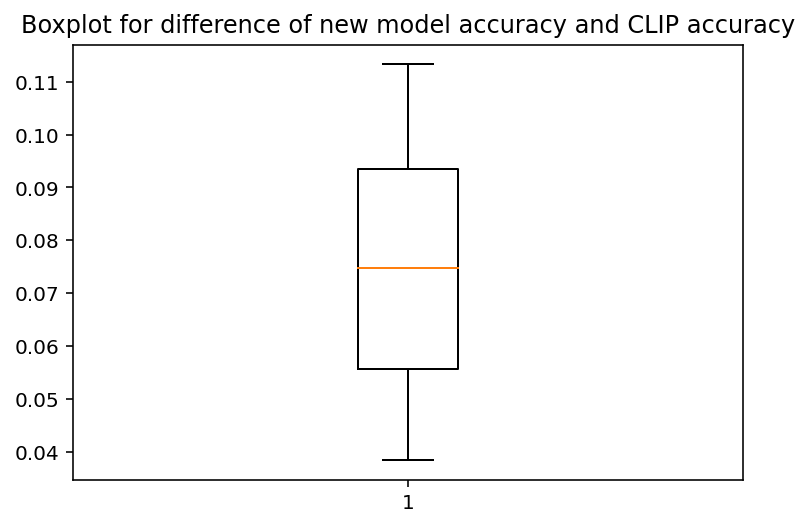

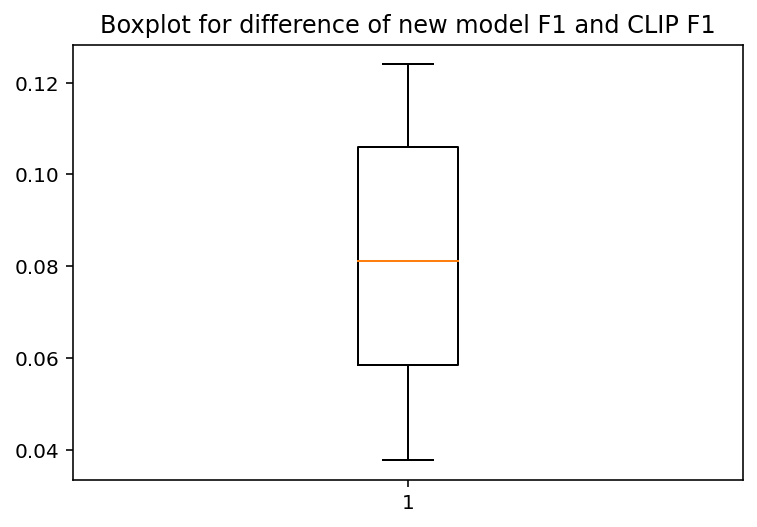

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot for difference of new model accuracy and CLIP accuracy')
ax1.boxplot(diff_acc);

fig2, ax2 = plt.subplots()
ax2.set_title('Boxplot for difference of new model F1 and CLIP F1')
ax2.boxplot(diff_f1);